# Importing library's

In [ ]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
nvda_short_data = yf.download("NVDA", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [ ]:
nvda_short_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,
2024-12-30 14:30:00+00:00,135.056000,135.240005,134.410004,135.134399,8651110
2024-12-30 14:32:00+00:00,134.360001,135.179993,134.020004,135.089996,1983377
2024-12-30 14:34:00+00:00,135.009995,135.059998,134.225006,134.375000,1547074
2024-12-30 14:36:00+00:00,135.559998,135.570007,134.580002,135.024200,1460709
2024-12-30 14:38:00+00:00,135.899994,136.059998,135.505005,135.539993,1894842


In [ ]:
# rename the columns
new_column_names = ["Close", "High", "Low", "Open", "Volume"]
nvda_short_data.columns = new_column_names

In [ ]:
nvda_short_data.tail()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-28 20:50:00+00:00,127.941803,127.989998,127.559998,127.919998,3506498
2025-01-28 20:52:00+00:00,128.231293,128.250000,127.810097,127.942001,5387876
2025-01-28 20:54:00+00:00,128.384995,128.580002,128.100006,128.229996,5280095
2025-01-28 20:56:00+00:00,127.785004,128.440002,127.599998,128.380005,4921280
2025-01-28 20:58:00+00:00,128.980103,129.000000,127.620003,127.788101,9526058


In [ ]:
nvda_short_data.shape

(3705, 5)

In [ ]:
nvda_short_data.describe()

,Close,High,Low,Open,Volume
count,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,137.794607,137.963155,137.624417,137.798295,1.205706e+06
std,7.422793,7.399258,7.447706,7.424056,2.364500e+06
min,116.480003,117.070000,116.250000,116.480003,1.681590e+05
25%,134.614502,134.770004,134.460007,134.619995,4.981420e+05
50%,137.810104,137.940002,137.680099,137.809998,7.160290e+05
75%,142.990097,143.190002,142.824997,143.000000,1.306513e+06
max,152.080002,152.360001,151.899994,152.199997,1.009611e+08


In [ ]:
nvda_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3705 entries, 2024-12-30 14:30:00+00:00 to 2025-01-28 20:58:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3705 non-null   float64
 1   High    3705 non-null   float64
 2   Low     3705 non-null   float64
 3   Open    3705 non-null   float64
 4   Volume  3705 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 173.7 KB


In [ ]:
# check for the missing values
nvda_short_data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# download the data
nvda_short_data.to_csv("nvda_short_data.csv")

# Loading the data

In [ ]:
nvda_short_data = pd.read_csv("nvda_short_data.csv")

# Exploratory Analysis

In [ ]:
nvda_short_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2024-12-30 14:30:00+00:00,135.056000,135.240005,134.410004,135.134399,8651110
1,2024-12-30 14:32:00+00:00,134.360001,135.179993,134.020004,135.089996,1983377
2,2024-12-30 14:34:00+00:00,135.009995,135.059998,134.225006,134.375000,1547074
3,2024-12-30 14:36:00+00:00,135.559998,135.570007,134.580002,135.024200,1460709
4,2024-12-30 14:38:00+00:00,135.899994,136.059998,135.505005,135.539993,1894842


In [ ]:
nvda_short_data.shape

(3705, 6)

## Univariate Analysis

In [ ]:
nvda_short_data.describe()

,Close,High,Low,Open,Volume
count,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,137.794607,137.963155,137.624417,137.798295,1.205706e+06
std,7.422793,7.399258,7.447706,7.424056,2.364500e+06
min,116.480003,117.070000,116.250000,116.480003,1.681590e+05
25%,134.614502,134.770004,134.460007,134.619995,4.981420e+05
50%,137.810104,137.940002,137.680099,137.809998,7.160290e+05
75%,142.990097,143.190002,142.824997,143.000000,1.306513e+06
max,152.080002,152.360001,151.899994,152.199997,1.009611e+08


In [ ]:
nvda_short_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3705 non-null   object 
 1   Close     3705 non-null   float64
 2   High      3705 non-null   float64
 3   Low       3705 non-null   float64
 4   Open      3705 non-null   float64
 5   Volume    3705 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 173.8+ KB


In [ ]:
# change DAtetime data
nvda_short_data['Datetime'] = pd.to_datetime(nvda_short_data['Datetime'])

In [ ]:
# skewness and kurtosis
print("Skewness:", nvda_short_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", nvda_short_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     -0.623435
High      -0.608872
Low       -0.634277
Open      -0.621065
Volume    24.542267
dtype: float64
Kurtosis: Close       0.502890
High        0.477171
Low         0.520534
Open        0.499360
Volume    916.155028
dtype: float64


## Distribution Analysis

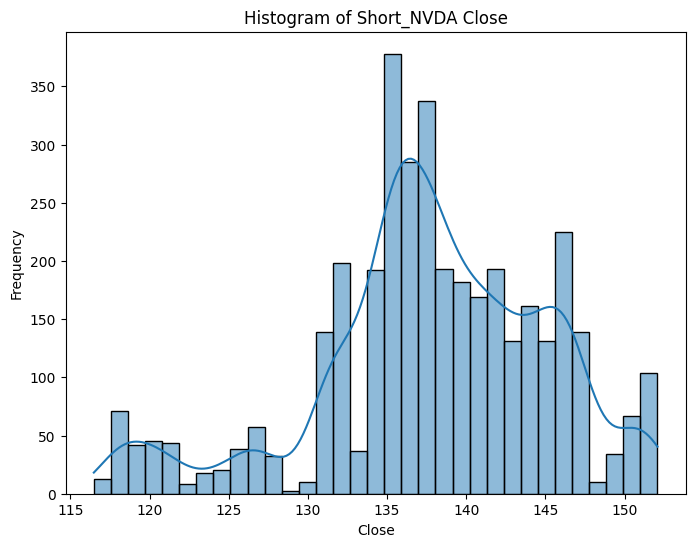

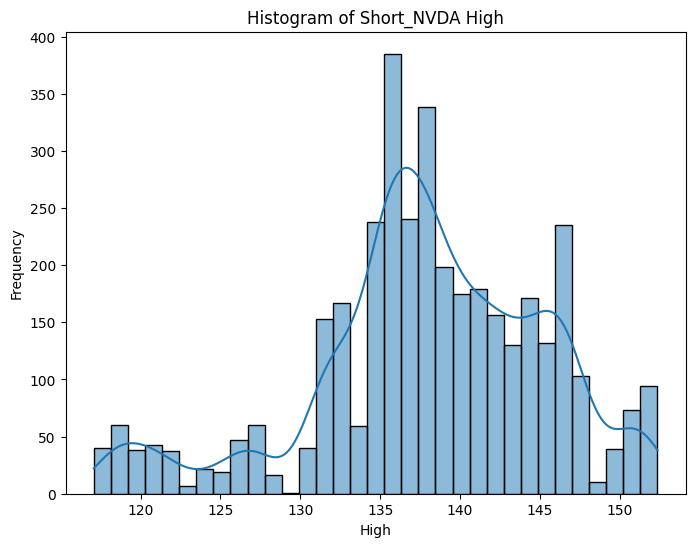

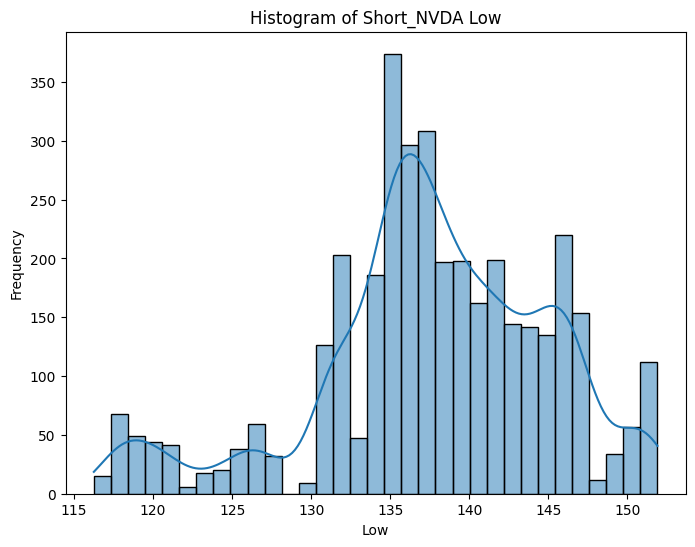

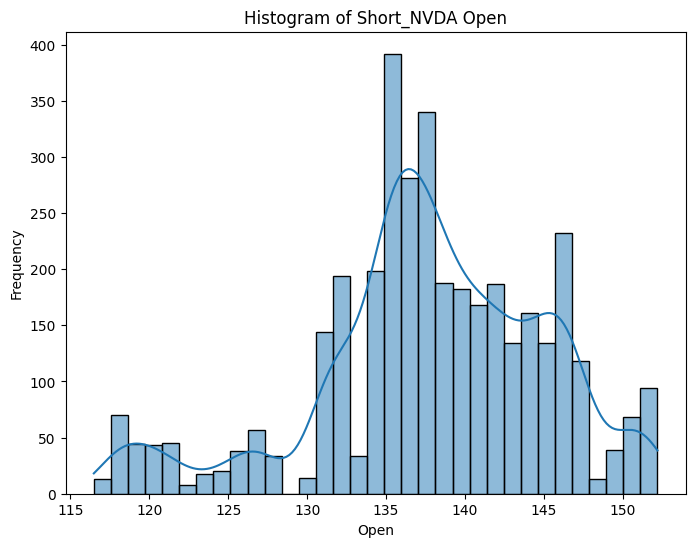

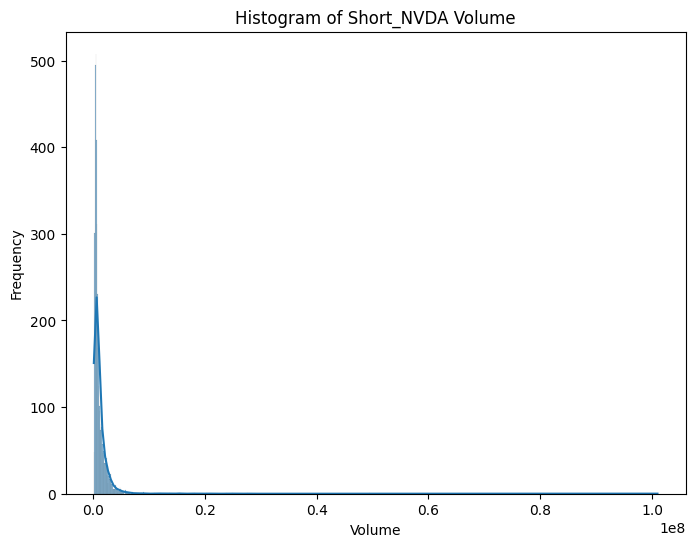

In [ ]:
# Identify numerical columns
numerical_columns = nvda_short_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(nvda_short_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(nvda_short_data[column], kde=True)
        plt.title(f'Histogram of Short_NVDA {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

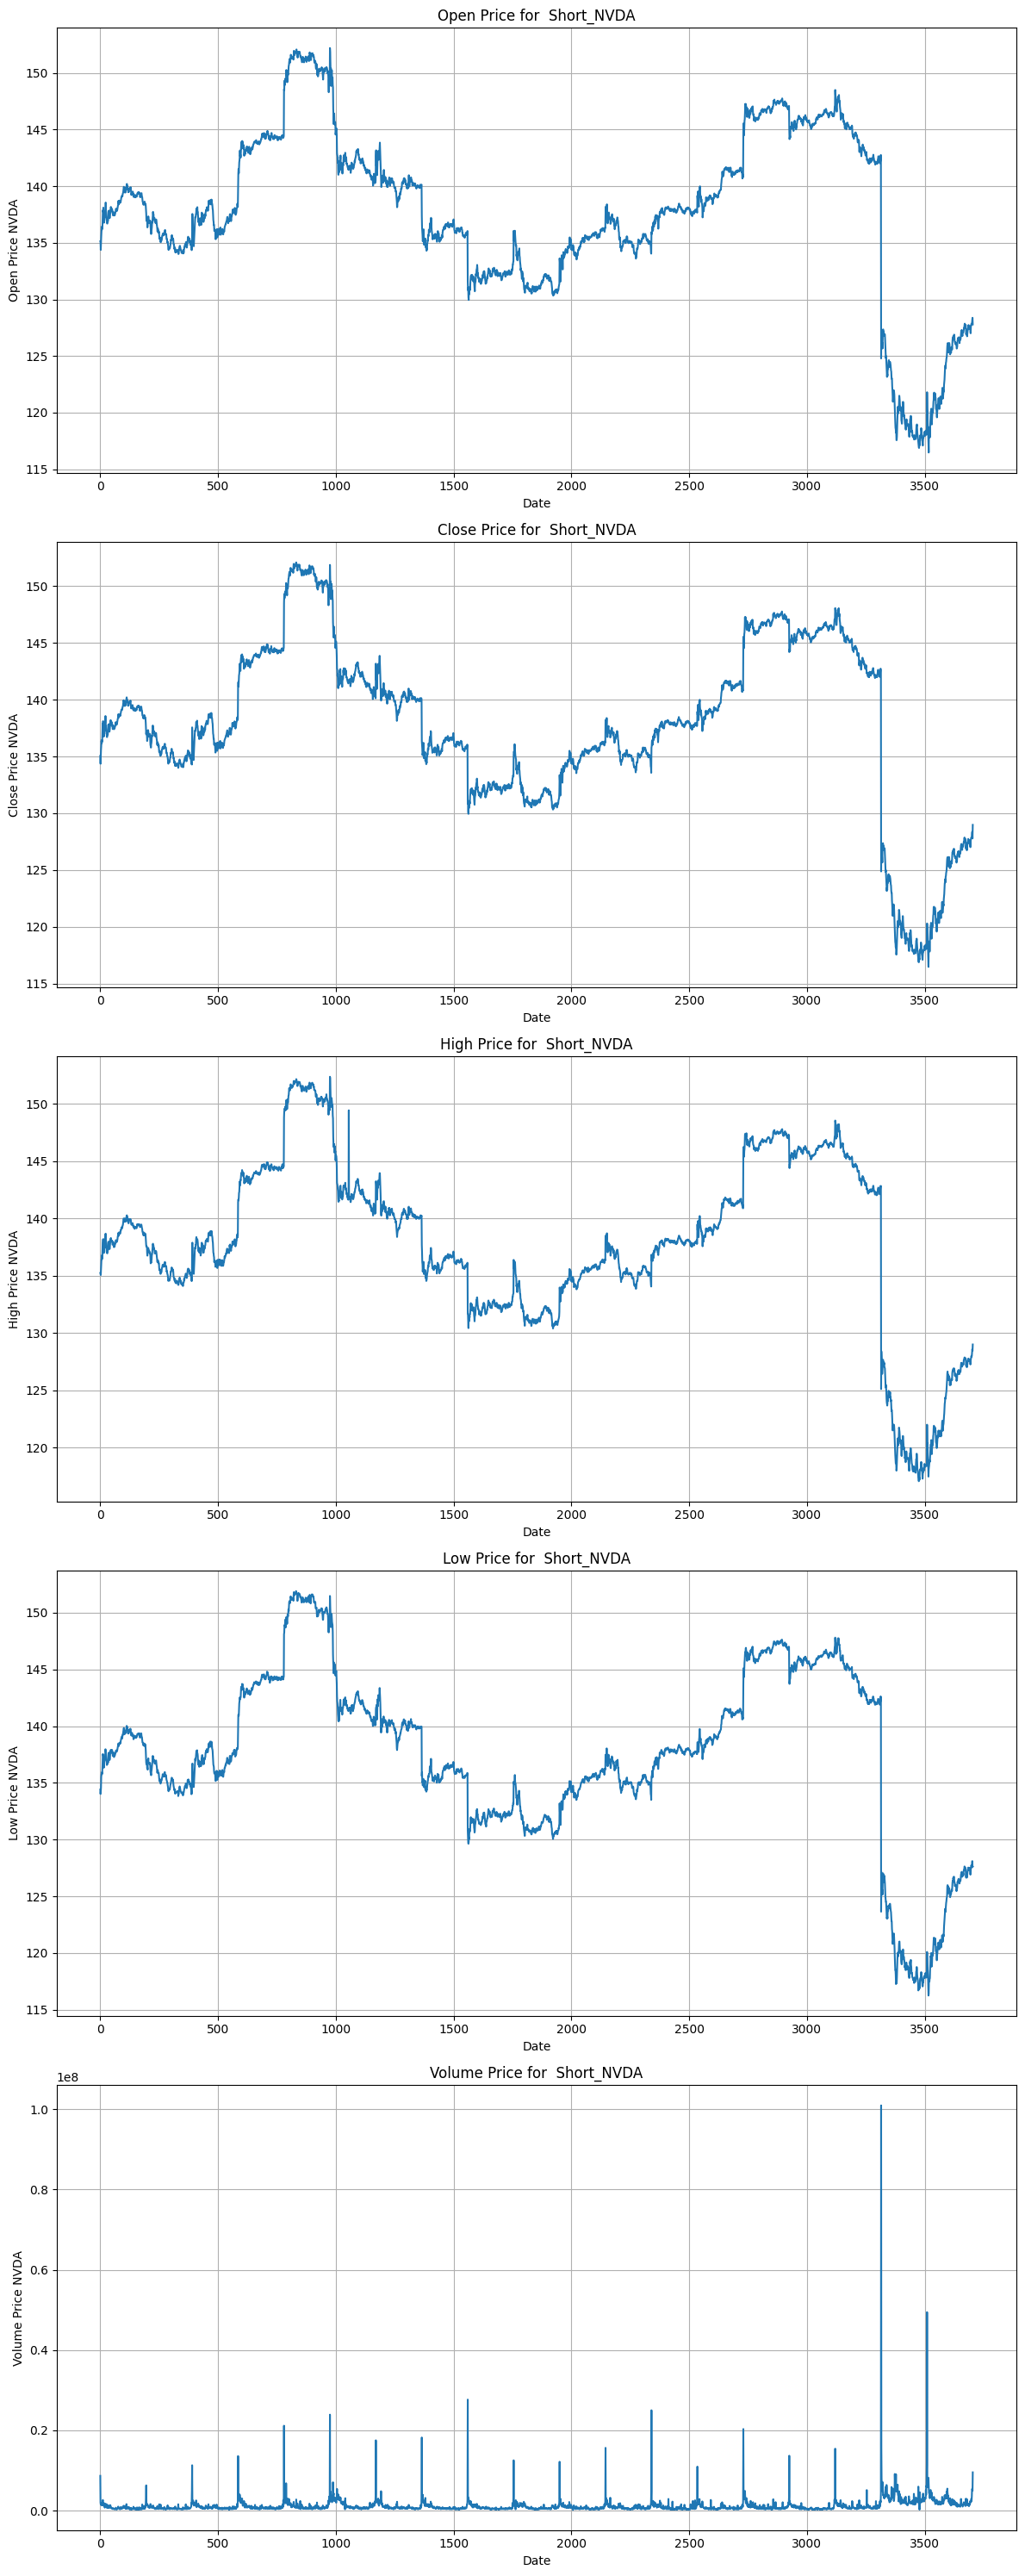

In [ ]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(nvda_short_data.index, nvda_short_data[col])
    axes[i].set_title(f'{col} Price for  Short_NVDA')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price NVDA')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

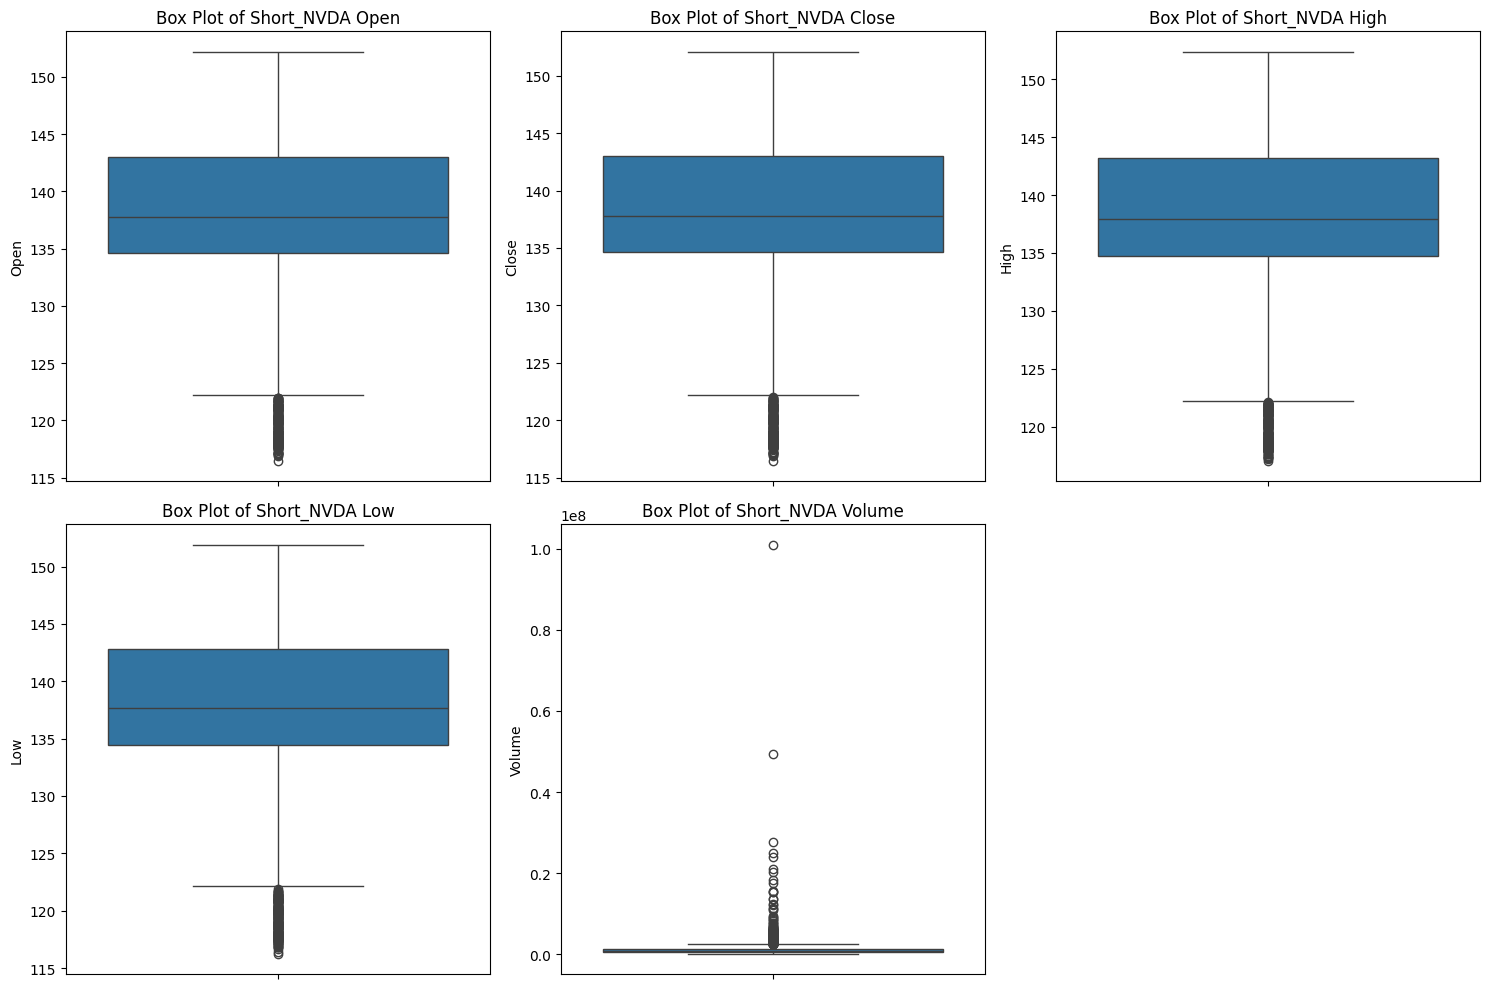

In [ ]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=nvda_short_data[col])
    plt.title(f'Box Plot of Short_NVDA {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

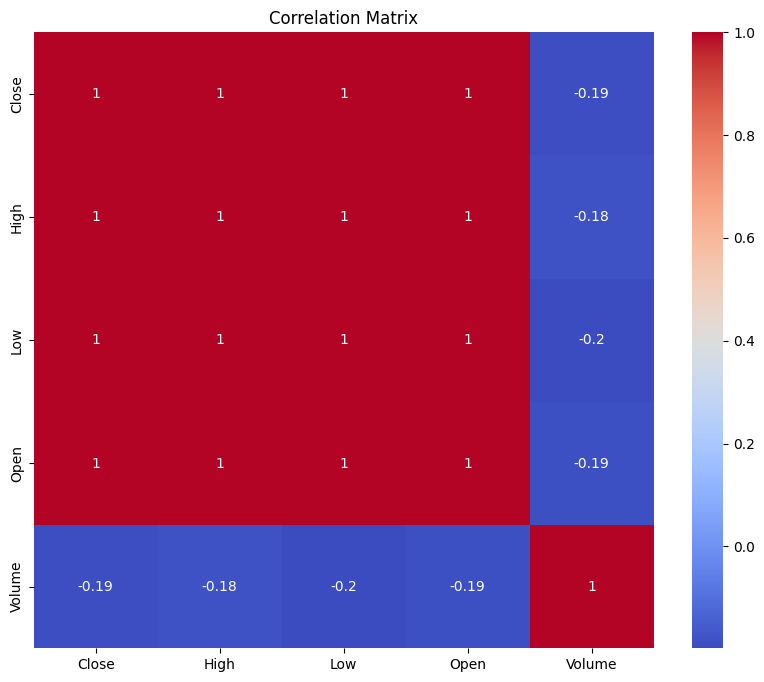

In [ ]:
correlation_matrix = nvda_short_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

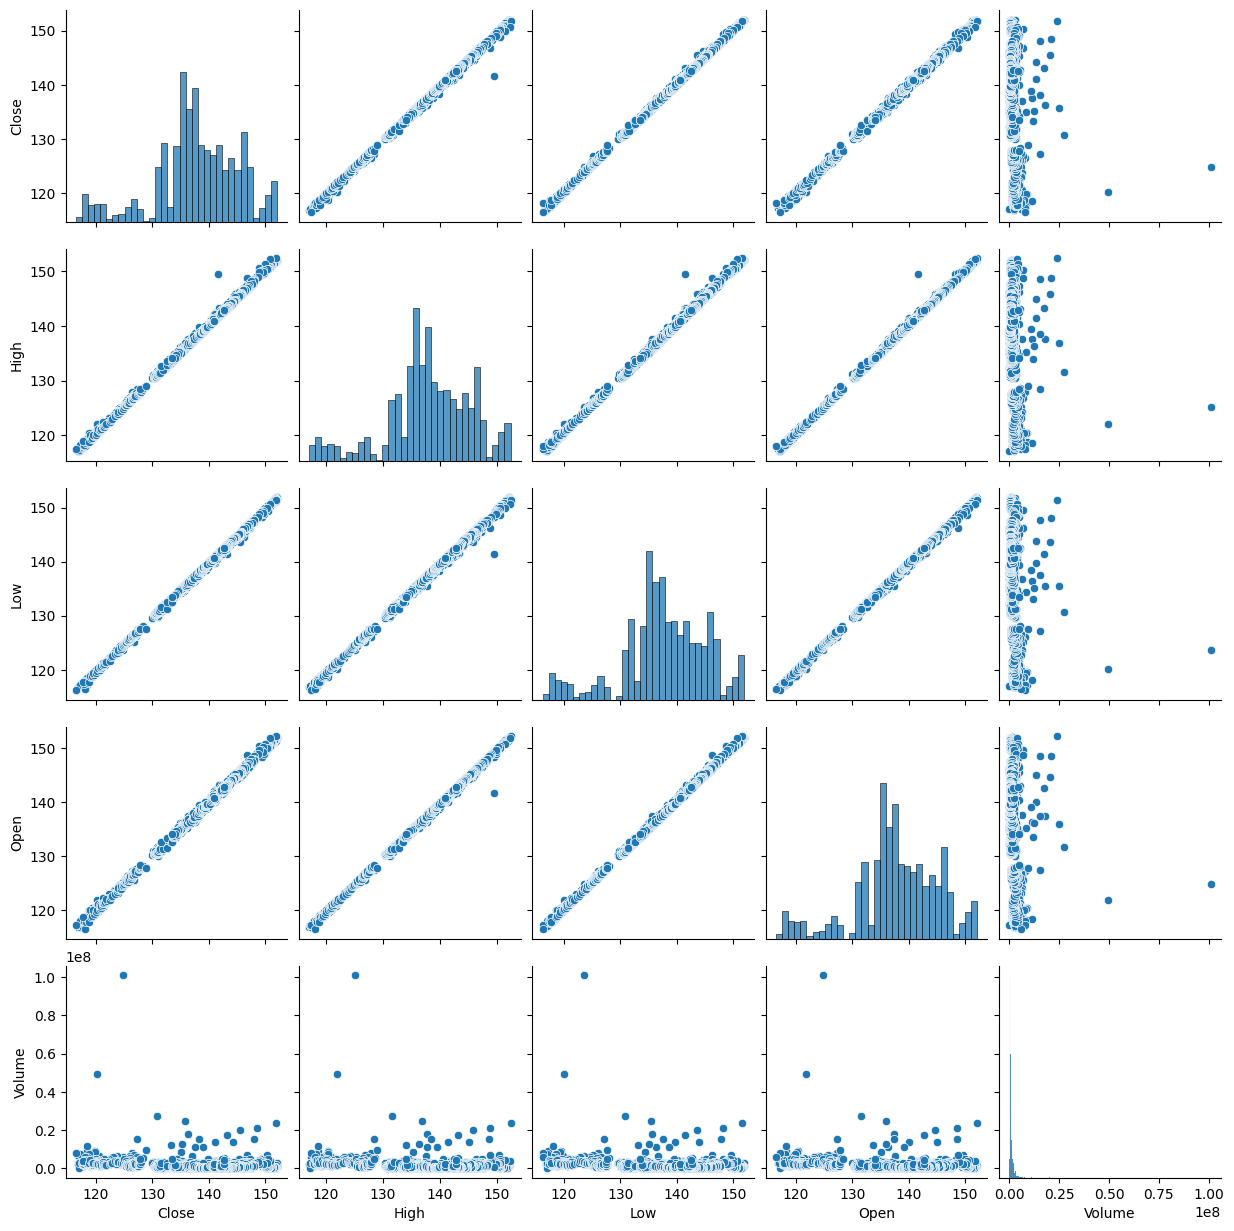

In [ ]:
# pairs of numerical columns
sns.pairplot(nvda_short_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'Short_NVDA Relationship between Close Price and Trading Volume')

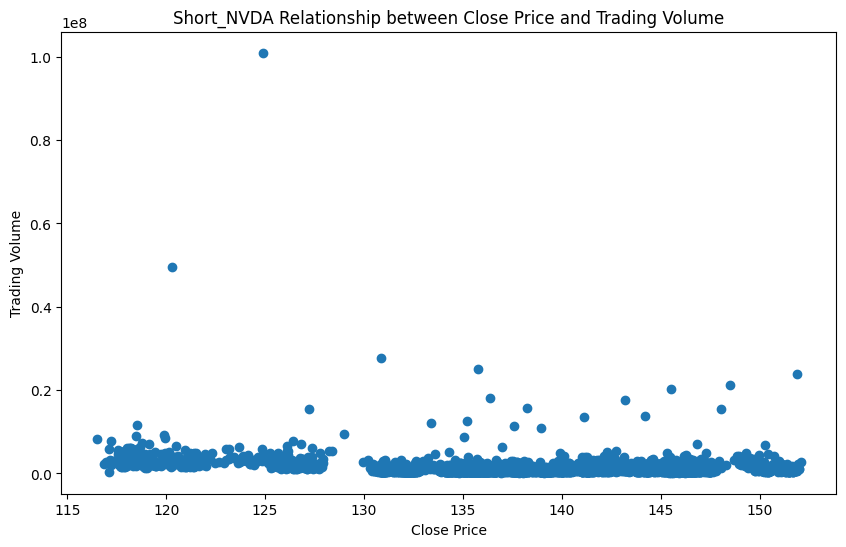

In [ ]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(nvda_short_data['Close'], nvda_short_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('Short_NVDA Relationship between Close Price and Trading Volume')

## Feature Engineering

In [ ]:
# Moving Average (SMA) with a 5-day and 10-day window
window_sma = 5
nvda_short_data['SMA'] = nvda_short_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 5-day window
nvda_short_data['StdDev'] = nvda_short_data['Close'].rolling(window=window_sma).std()
nvda_short_data['UpperBand'] = nvda_short_data['SMA'] + (2 * nvda_short_data['StdDev'])
nvda_short_data['LowerBand'] = nvda_short_data['SMA'] - (2 * nvda_short_data['StdDev'])

# RSI with a 7-day window
def calculate_rsi(data, window=7):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nvda_short_data['RSI'] = calculate_rsi(nvda_short_data)

In [ ]:
# Calculate moving averages
nvda_short_data['MA_5'] = nvda_short_data['Close'].rolling(window=5).mean()
nvda_short_data['MA_10'] = nvda_short_data['Close'].rolling(window=10).mean()

In [ ]:
nvda_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
MA_5,4
MA_10,9
SMA,4
StdDev,4


In [ ]:
# fill na with mean
nvda_short_data.fillna(nvda_short_data.mean(), inplace=True)

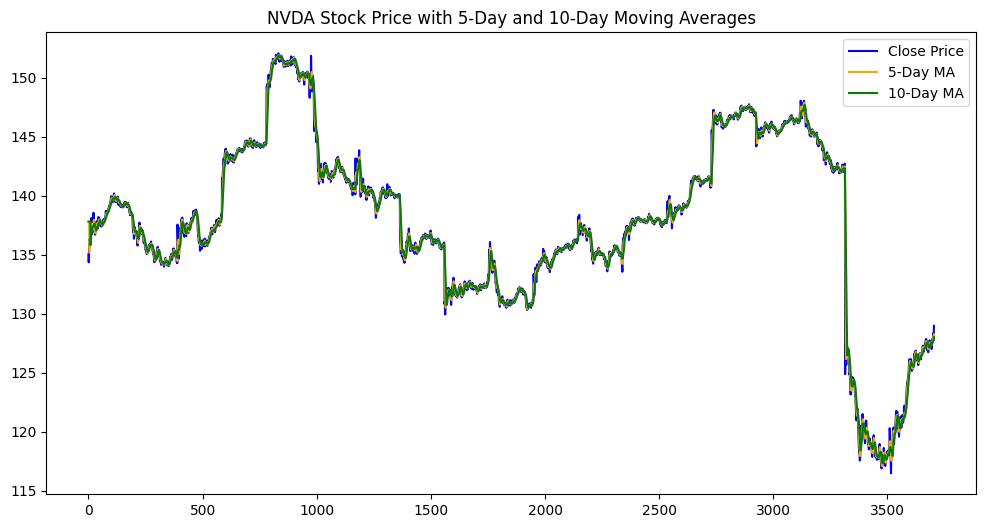

In [ ]:
# plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(nvda_short_data['Close'], label='Close Price', color='blue')
plt.plot(nvda_short_data['MA_5'], label='5-Day MA', color='orange')
plt.plot(nvda_short_data['MA_10'], label='10-Day MA', color='green')
plt.title('NVDA Stock Price with 5-Day and 10-Day Moving Averages')
plt.legend()
plt.show()

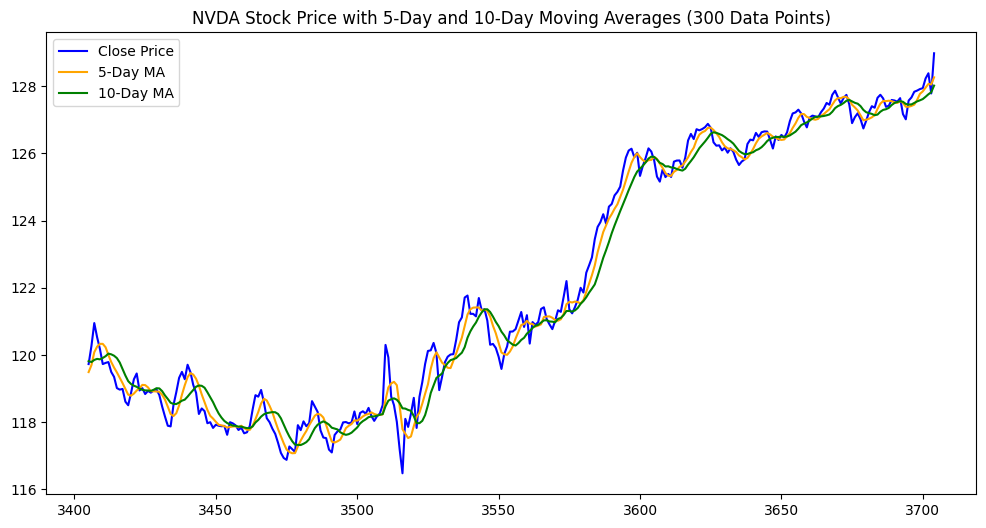

In [ ]:
# plot the moving averages for 300 data points
plt.figure(figsize=(12, 6))
plt.plot(nvda_short_data['Close'][-300:], label='Close Price', color='blue')
plt.plot(nvda_short_data['MA_5'][-300:], label='5-Day MA', color='orange')
plt.plot(nvda_short_data['MA_10'][-300:], label='10-Day MA', color='green')
plt.title('NVDA Stock Price with 5-Day and 10-Day Moving Averages (300 Data Points)')
plt.legend()
plt.show()

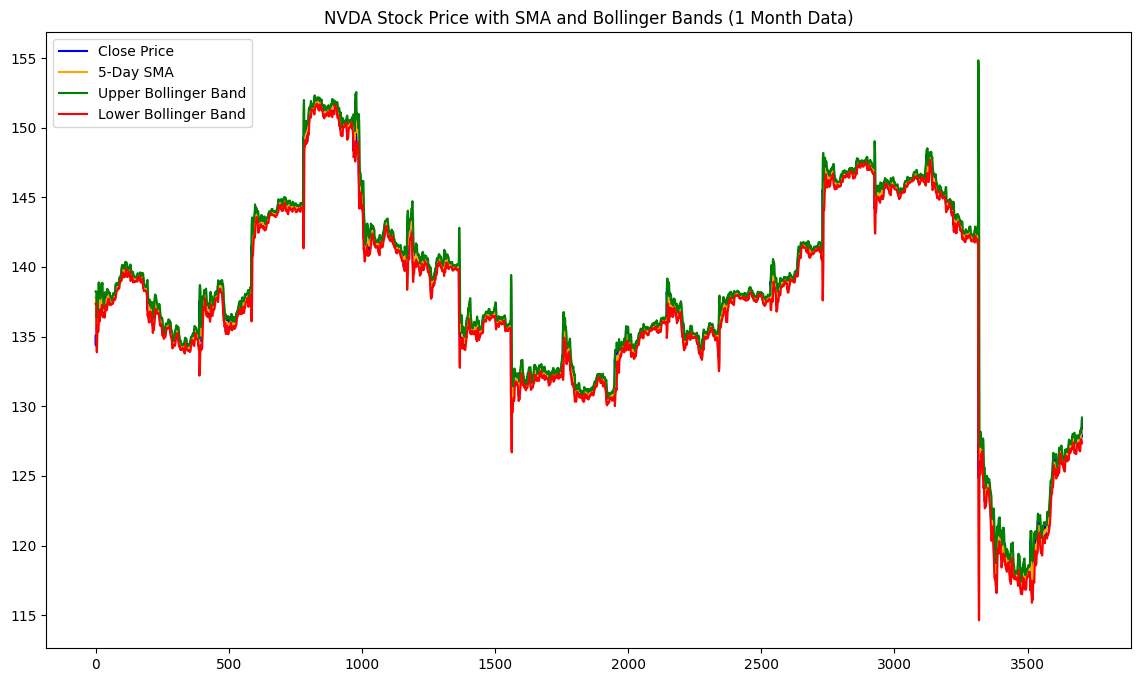

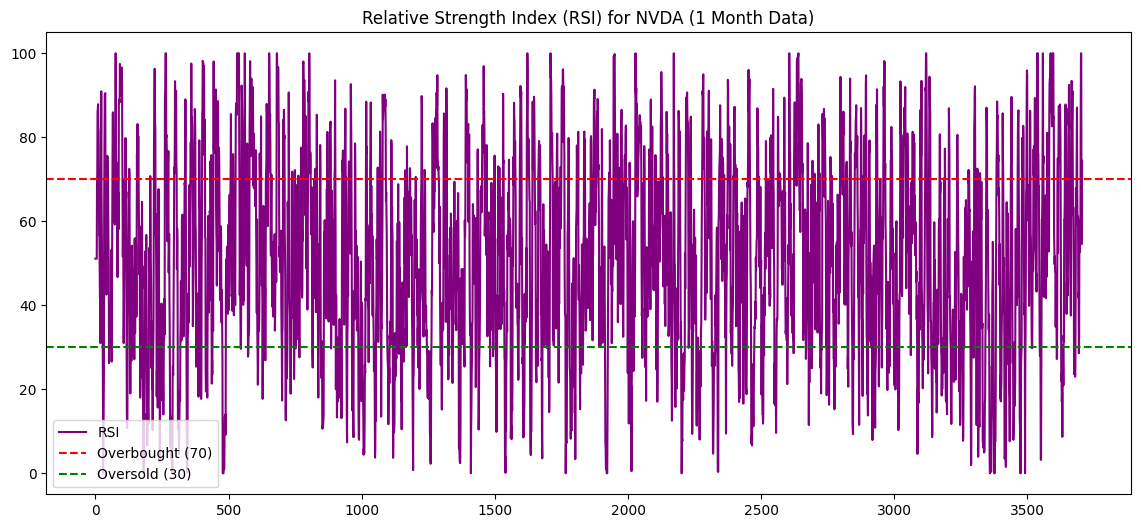

In [ ]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(nvda_short_data['Close'], label='Close Price', color='blue')
plt.plot(nvda_short_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(nvda_short_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(nvda_short_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(nvda_short_data.index, nvda_short_data['UpperBand'], nvda_short_data['LowerBand'], color='gray', alpha=0.3)
plt.title('NVDA Stock Price with SMA and Bollinger Bands (1 Month Data)')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_short_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for NVDA (1 Month Data)')
plt.legend()
plt.show()

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


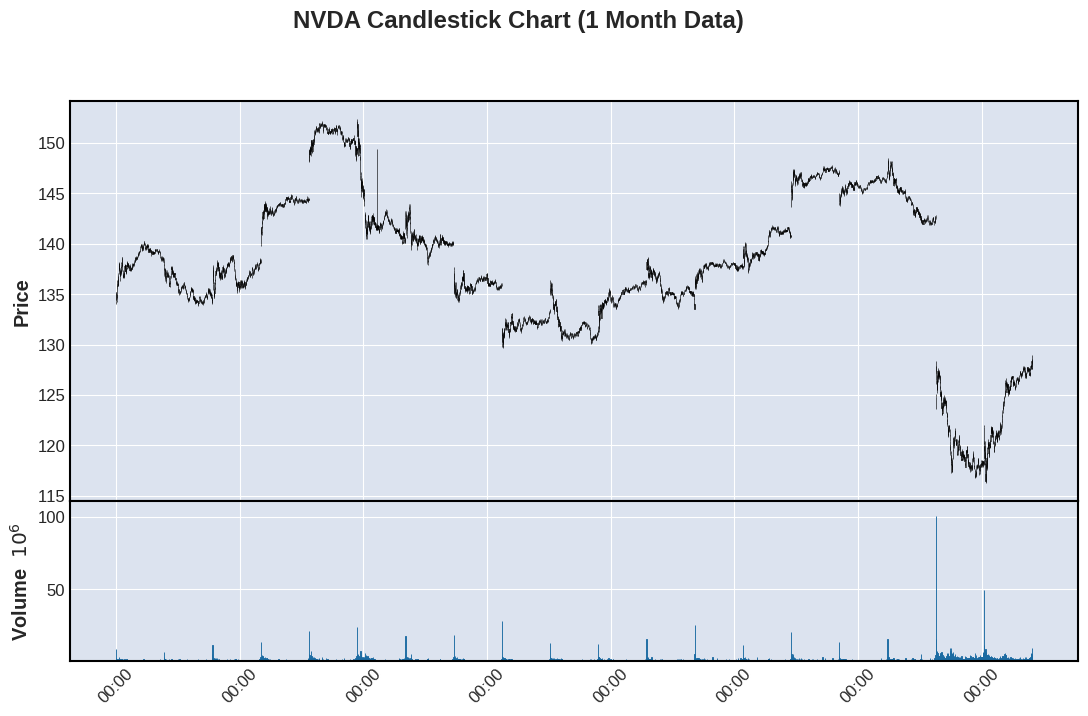

In [ ]:
import mplfinance as mpf

# Ensure the index is a datetime object
nvda_short_data.index = pd.to_datetime(nvda_short_data.index)

# Plot candlestick chart
mpf.plot(nvda_short_data, type='candle', volume=True, figsize=(14, 8), title='NVDA Candlestick Chart (1 Month Data)')

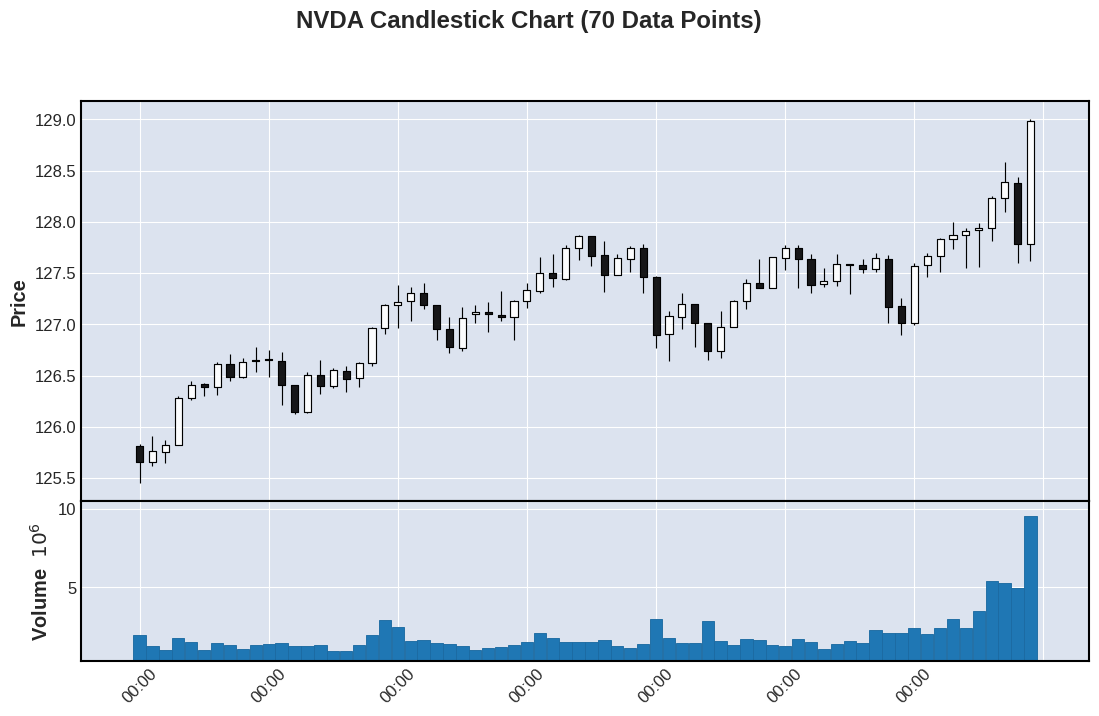

In [ ]:
# plot candelstic for Close for 70 data points
mpf.plot(nvda_short_data.tail(70), type='candle', volume=True, figsize=(14, 8), title='NVDA Candlestick Chart (70 Data Points)')


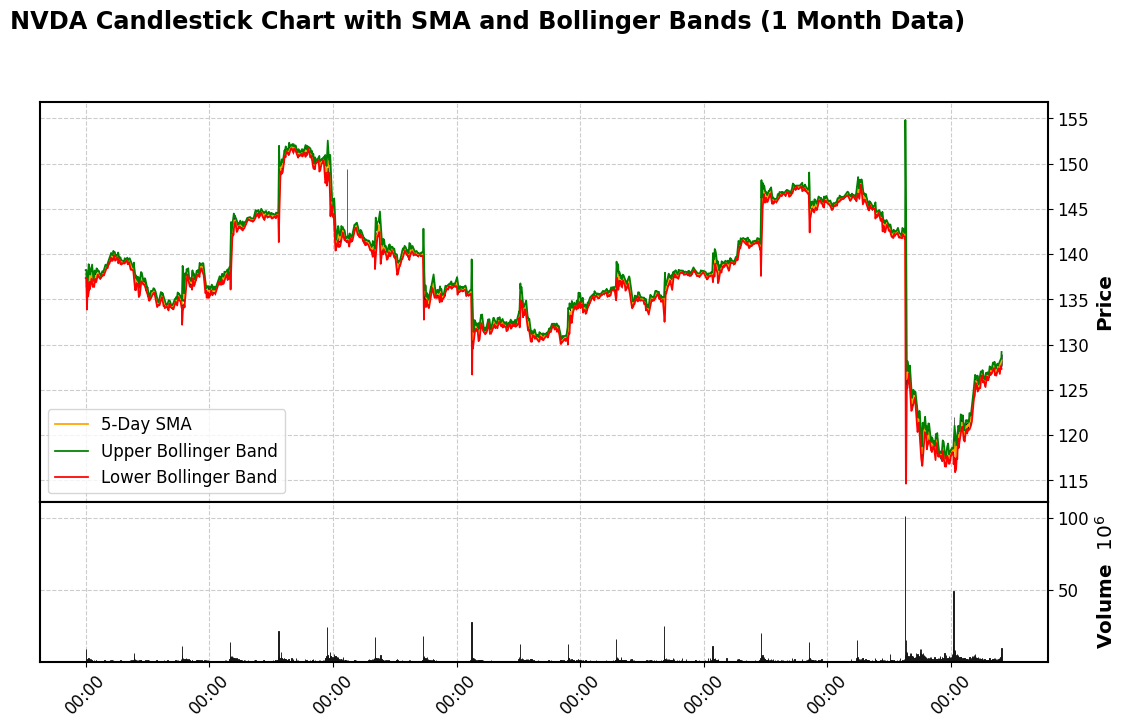

In [ ]:
# plots for SMA and Bollinger Bands
ap = [
    mpf.make_addplot(nvda_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(nvda_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_short_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    nvda_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='NVDA Candlestick Chart with SMA and Bollinger Bands (1 Month Data)',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')

)

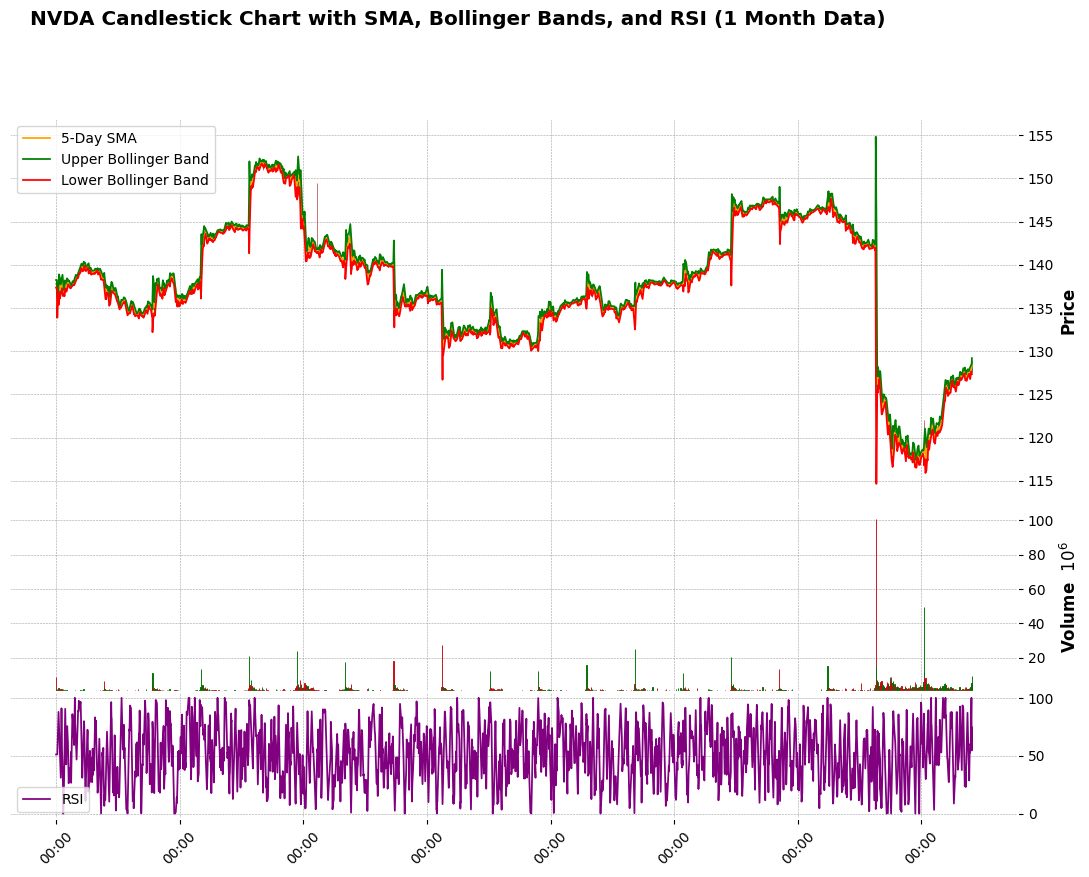

In [ ]:
# plots for SMA, Bollinger Bands, and RSI
ap = [
    mpf.make_addplot(nvda_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(nvda_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_short_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(nvda_short_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    nvda_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='NVDA Candlestick Chart with SMA, Bollinger Bands, and RSI (1 Month Data)',
    style='charles',
    panel_ratios=(6, 3, 2)
)

## Time Series Decomposition

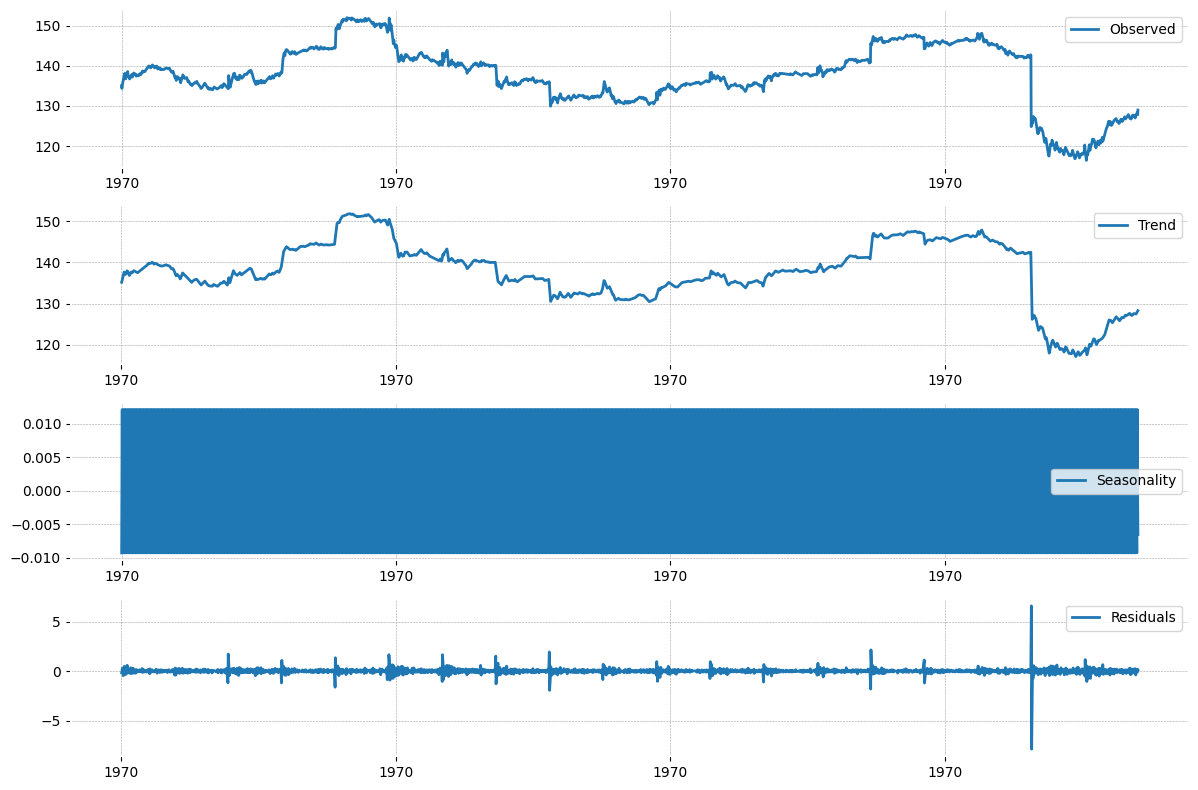

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(nvda_short_data['Close'], model='additive', period=5)  # Weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.31%


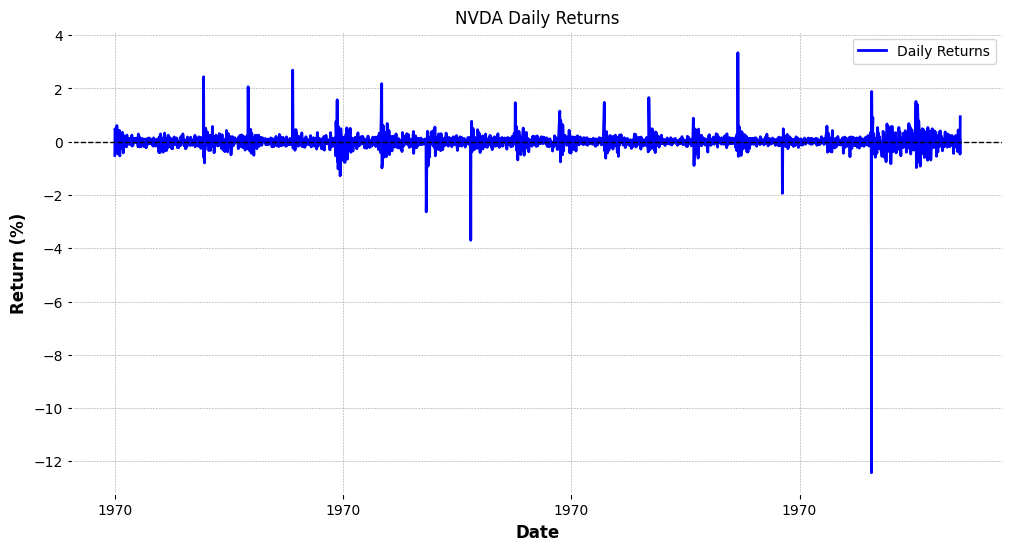

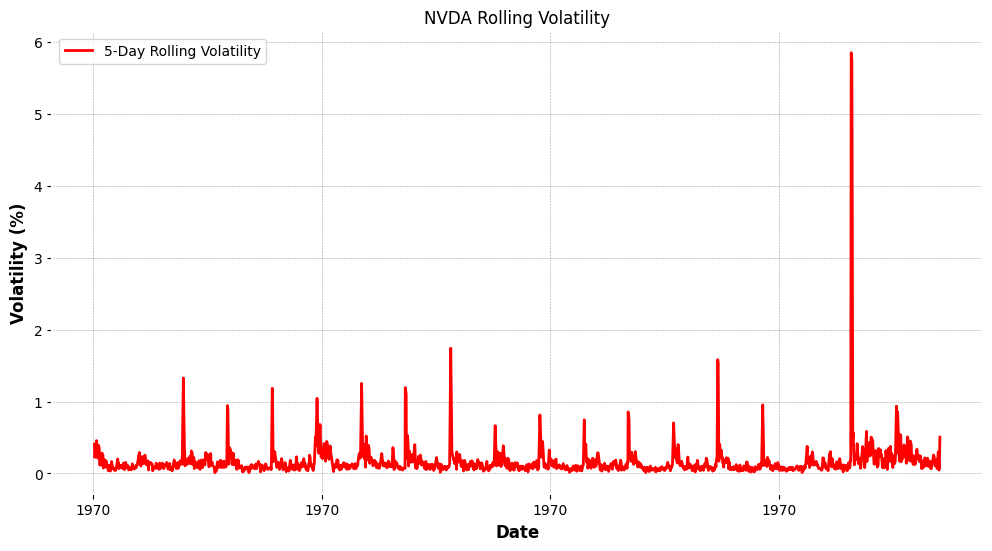

In [ ]:
# Calculate daily returns
nvda_short_data['Daily_Return'] = nvda_short_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = nvda_short_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_short_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('NVDA Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
nvda_short_data['Rolling_Volatility'] = nvda_short_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(nvda_short_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('NVDA Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(nvda_short_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.4560458698390055
p-value: 0.5551320641156339
Critical Values:
   1%: -3.4321171722587502
   5%: -2.8623208388650476
   10%: -2.5671856517888547
The data is non-stationary (fail to reject the null hypothesis).


In [ ]:
# Apply differencing
nvda_short_data['Close_diff'] = nvda_short_data['Close'].diff().dropna()

In [ ]:
nvda_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
MA_5,0
MA_10,0
SMA,0
StdDev,0


In [ ]:
# drop na
nvda_short_data.dropna(inplace=True)

In [ ]:
# Recheck stationarity using ADF test
result = adfuller(nvda_short_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -64.9090218362229
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

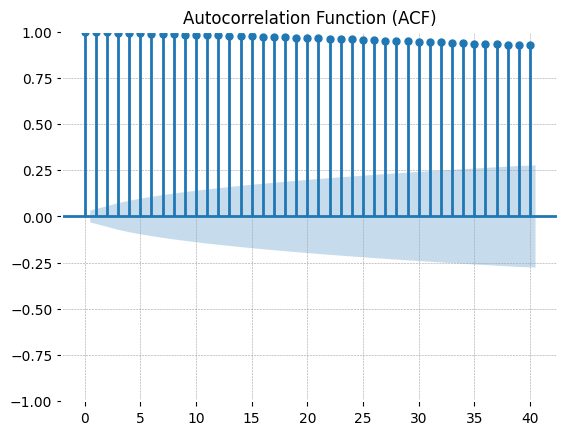

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

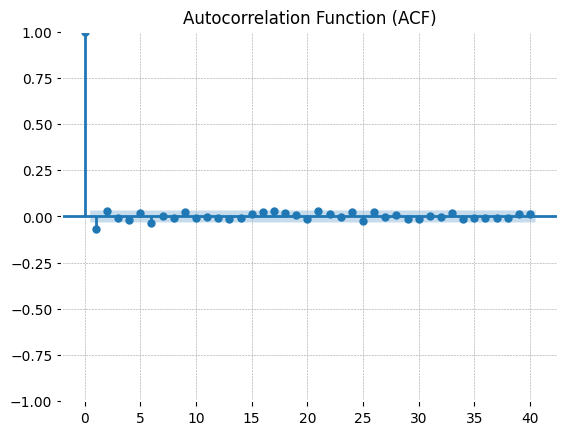

In [ ]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_short_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [ ]:
# download the data
nvda_short_data.to_csv("nvda_short_data.csv")

# LSTM Model

In [ ]:
nvda_short_data.head()

,Datetime,Close,High,Low,Open,Volume,MA_5,MA_10,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff
1970-01-01 00:00:00.000000005,2024-12-30 14:40:00+00:00,136.380203,136.429993,135.740005,135.929993,1449997,135.442038,137.809232,135.442038,0.784420,137.010878,133.873198,51.086110,0.353355,0.406591,0.480209
1970-01-01 00:00:00.000000006,2024-12-30 14:42:00+00:00,136.160004,136.399994,135.850006,136.399994,1336611,135.802039,137.809232,135.802039,0.538035,136.878108,134.725969,68.798587,-0.161460,0.253965,-0.220200
1970-01-01 00:00:00.000000007,2024-12-30 14:44:00+00:00,136.440598,136.779999,135.929993,136.164993,1680625,136.088159,137.809232,136.088159,0.363671,136.815500,135.360818,71.520047,0.206077,0.223140,0.280594
1970-01-01 00:00:00.000000008,2024-12-30 14:46:00+00:00,136.290802,136.470001,135.772598,136.440002,1329067,136.234320,137.809232,136.234320,0.214662,136.663644,135.804996,86.146612,-0.109788,0.229267,-0.149796
1970-01-01 00:00:00.000000009,2024-12-30 14:48:00+00:00,137.039993,137.059998,136.270493,136.300003,1707560,136.462320,135.819759,136.462320,0.339755,137.141831,135.782809,86.642723,0.549701,0.302990,0.749191


In [ ]:
# get the Date out of the index
nvda_short_data.reset_index(inplace=True)

In [ ]:
nvda_short_data

,Datetime,Close_diff
0,2024-12-30 14:40:00+00:00,0.480209
1,2024-12-30 14:42:00+00:00,-0.220200
2,2024-12-30 14:44:00+00:00,0.280594
3,2024-12-30 14:46:00+00:00,-0.149796
4,2024-12-30 14:48:00+00:00,0.749191
...,...,...
3695,2025-01-28 20:50:00+00:00,0.026802
3696,2025-01-28 20:52:00+00:00,0.289490
3697,2025-01-28 20:54:00+00:00,0.153702
3698,2025-01-28 20:56:00+00:00,-0.599991


In [ ]:
# isolet the Date and Sales columns
nvda_short_data = nvda_short_data[['Datetime', 'Close_diff']]

In [ ]:
nvda_short_data

,Datetime,Close_diff
0,2024-12-30 14:40:00+00:00,0.480209
1,2024-12-30 14:42:00+00:00,-0.220200
2,2024-12-30 14:44:00+00:00,0.280594
3,2024-12-30 14:46:00+00:00,-0.149796
4,2024-12-30 14:48:00+00:00,0.749191
...,...,...
3695,2025-01-28 20:50:00+00:00,0.026802
3696,2025-01-28 20:52:00+00:00,0.289490
3697,2025-01-28 20:54:00+00:00,0.153702
3698,2025-01-28 20:56:00+00:00,-0.599991


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(nvda_short_data) * 0.8)  # 80% for training
train_data = nvda_short_data[:train_size]
test_data = nvda_short_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close_diff
Datetime,
2024-12-30 14:40:00+00:00,0.480209
2024-12-30 14:42:00+00:00,-0.220200
2024-12-30 14:44:00+00:00,0.280594
2024-12-30 14:46:00+00:00,-0.149796
2024-12-30 14:48:00+00:00,0.749191
...,...
2025-01-23 15:40:00+00:00,0.020004
2025-01-23 15:42:00+00:00,-0.014999
2025-01-23 15:44:00+00:00,0.144989


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-30 14:40:00+0000', tz='UTC'),
 Timestamp('2025-01-23 15:48:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-23 15:50:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:58:00+0000', tz='UTC'))

## Normalize the data

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 60
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0990
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0010
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.6331e-04
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0011
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 8.9262e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
18.450218200683594


In [ ]:
# evaluate the model performance with RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.7690434652501827


In [ ]:
# evaluate the model perfomance with MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_targets, test_predictions)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.2592921326077301


In [ ]:
# evaluate the model performance with MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_targets, test_predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Percentage Error (MAPE): inf


In [ ]:
# evaluate the model
train_loss = model.evaluate(train_sequences.reshape(-1, sequence_length, 1), train_targets)
#test_loss = model.evaluate(test_sequences.reshape(-1, sequence_length, 1), test_targets)

print(f"Train Loss: {train_loss}")
#print(f"Test Loss: {test_loss}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0010
Train Loss: 0.001139432075433433


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# fine-tune model hyperparameters
start_time = time.time()
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1118
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0011
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.1301e-04
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.9132e-04
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
16.084813833236694


In [ ]:
# evaluate the model performance with RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.9271831954229561


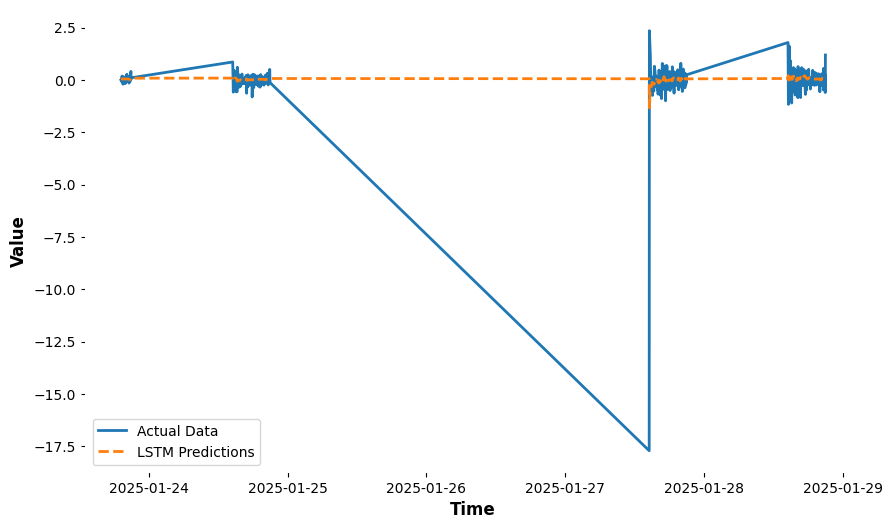

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

-966.4739220552165


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

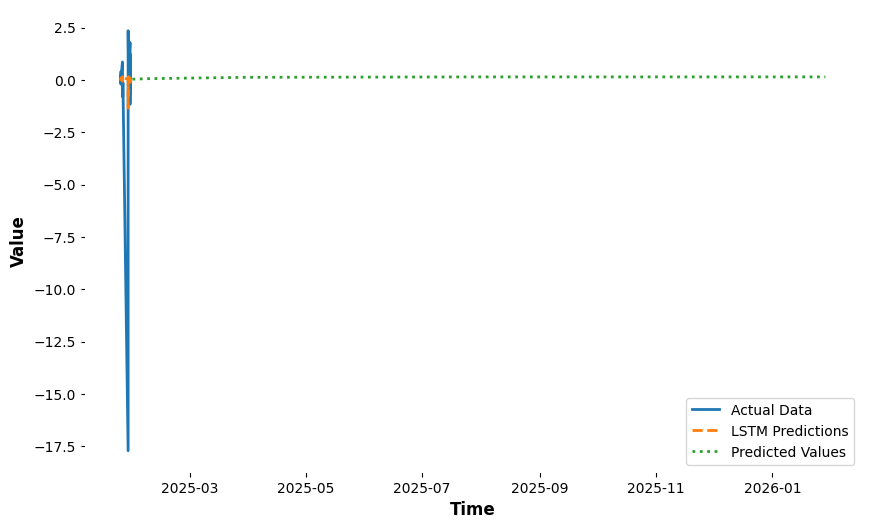

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()